In [ ]:
# Start writing code here...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multinomial, dirichlet

In [16]:
df = pd.read_excel('Datosfinal.xlsx', sheet_name='Datos_por_dia')
datos2021 = df.to_numpy()[189:, 3:]
datos2021 = np.array(datos2021, dtype=int)

In [10]:
df2 = pd.read_excel('Datos_2vuelta.xlsx', sheet_name='Datos_por_dia_2v')
datos2vuelta = df2.to_numpy()[:, 2:]
datos2vuelta = np.array(datos2vuelta, dtype=int)

In [7]:
len(datos2vuelta)

96

In [15]:
datos2021

NameError: name 'datos2021' is not defined

In [45]:
def modelo(data, N):
    post = lambda p, alpha: dirichlet.logpdf(p, alpha)
    days = np.size(data, axis=0)
    cand = np.size(data, axis=1)
    muestra = np.zeros((N, days, cand))
    prior = np.full(cand, 1/cand)
    d = 0.05
    c = np.zeros(days)
    for i in range(N):
        for day in range(days):
            if day == 0:
                p = prior
            else:
                p = muestra[i, day-1]
            y = data[day]
            p_prueba = np.random.uniform(np.maximum(p-d,0), p+d, size=cand)
            p_prueba = p_prueba/p_prueba.sum()
            alpha = 100 * p + y
            if post(p_prueba, alpha) - post(p, alpha) > np.log(np.random.uniform()):
                muestra[i, day] = p_prueba
                c[day] += 1
            else:
                muestra[i, day] = p
    return muestra, c

In [11]:
muestra2v, prediccion, c = modelo2021(datos2vuelta, 10000)


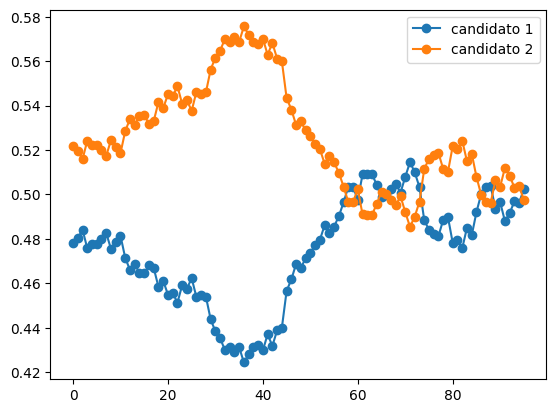

In [18]:
prop = muestra2v[2000::200].mean(0)
days = len(datos2vuelta)
for i in range(2):
    plt.plot(range(days), prop[1:,i], 'o-', label= 'candidato {}'.format(i+1))
plt.legend()

## d=0.1

In [75]:
def modelo_v2(data, N, d=0.1):
    post = lambda p, alpha: dirichlet.logpdf(p, alpha)
    days = np.size(data, axis=0)
    muestra = np.zeros((N, days, 4))
    prior = np.full(4, 0.25)
    c = np.zeros(days)
    for i in range(N):
        p = prior
        for day in range(days):
            y = data[day]
            if y.sum() > 0:
                n = y.sum()
            p_prueba = np.random.uniform(np.maximum(p-d,0), p+d, size=4)
            p_prueba = p_prueba/p_prueba.sum()
            alpha = 100 * p + y
            if post(p_prueba, alpha) - post(p, alpha) > np.log(np.random.uniform()):
                p = p_prueba
                c[day] += 1
            muestra[i, day] = multinomial.rvs(n, p)
    return muestra, c


In [66]:
np.random.seed(789)
muestra2, c = modelo_v2(datos2021, 5_000)
muestra2 = muestra2[1000::100]
y = muestra2.mean(0)

In [68]:
days = np.size(y, 0)
for i in range(days):
    print('aceptados dia {}: {:%}'.format(i+1, c[i]/5_000))

aceptados dia 1: 36.180000%
aceptados dia 2: 23.060000%
aceptados dia 3: 23.800000%
aceptados dia 4: 22.540000%
aceptados dia 5: 23.400000%
aceptados dia 6: 22.860000%
aceptados dia 7: 21.900000%
aceptados dia 8: 22.960000%
aceptados dia 9: 22.400000%
aceptados dia 10: 21.860000%
aceptados dia 11: 22.540000%
aceptados dia 12: 22.500000%
aceptados dia 13: 22.280000%
aceptados dia 14: 23.080000%
aceptados dia 15: 31.660000%
aceptados dia 16: 35.760000%
aceptados dia 17: 36.600000%
aceptados dia 18: 20.880000%
aceptados dia 19: 28.580000%
aceptados dia 20: 20.560000%
aceptados dia 21: 21.360000%
aceptados dia 22: 30.680000%
aceptados dia 23: 21.460000%
aceptados dia 24: 21.540000%
aceptados dia 25: 20.820000%
aceptados dia 26: 29.900000%
aceptados dia 27: 20.800000%
aceptados dia 28: 20.020000%
aceptados dia 29: 20.160000%
aceptados dia 30: 30.760000%
aceptados dia 31: 28.940000%
aceptados dia 32: 19.840000%
aceptados dia 33: 21.040000%
aceptados dia 34: 20.100000%
aceptados dia 35: 20.32

In [69]:
q = [0.025, 0.975]
q1, q2 = np.quantile(muestra2, q, axis=0)
porcentajes = np.zeros((days, 4))
for day in range(days):
    x = y[day]
    porcentajes[day] = x / x.sum()
    q1[day] = q1[day] / q1[day].sum()
    q2[day] = q2[day] / q2[day].sum()


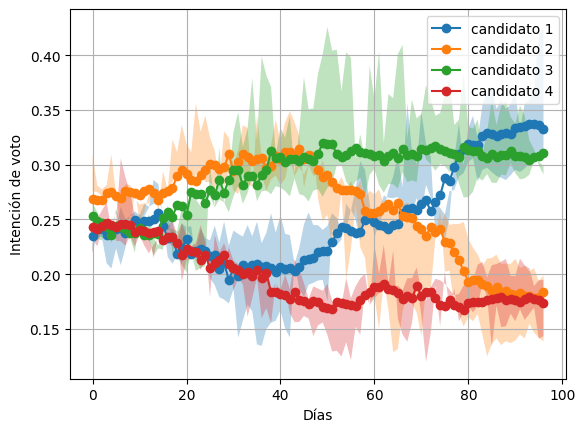

In [72]:
for i in range(4):
    plt.plot(range(days), porcentajes[:,i], 'o-', label= 'candidato {}'.format(i+1))
    plt.fill_between(range(days), q1[:,i], q2[:,i],alpha=0.3)
plt.xlabel("Días")
plt.ylabel("Intención de voto")
plt.grid()
plt.legend()

In [71]:
pred = porcentajes[-1]
print('Kast: {:%}'.format(pred[0]))
print('Sichel: {:%}'.format(pred[1]))
print('Boric: {:%}'.format(pred[2]))
print('Provoste: {:%}'.format(pred[3]))

Kast: 33.248342%
Sichel: 18.342662%
Boric: 31.075871%
Provoste: 17.333126%


## d=0.01

In [76]:
np.random.seed(789)
muestra2, c = modelo_v2(datos2021, 5_000, d=0.01)
muestra2 = muestra2[1000::100]
y = muestra2.mean(0)

In [77]:
days = np.size(y, 0)
for i in range(days):
    print('aceptados dia {}: {:%}'.format(i+1, c[i]/5_000))

aceptados dia 1: 52.980000%
aceptados dia 2: 98.200000%
aceptados dia 3: 97.660000%
aceptados dia 4: 98.000000%
aceptados dia 5: 98.320000%
aceptados dia 6: 98.140000%
aceptados dia 7: 98.120000%
aceptados dia 8: 98.120000%
aceptados dia 9: 98.060000%
aceptados dia 10: 97.940000%
aceptados dia 11: 98.200000%
aceptados dia 12: 97.880000%
aceptados dia 13: 98.440000%
aceptados dia 14: 98.260000%
aceptados dia 15: 56.900000%
aceptados dia 16: 56.320000%
aceptados dia 17: 61.780000%
aceptados dia 18: 98.420000%
aceptados dia 19: 68.420000%
aceptados dia 20: 98.100000%
aceptados dia 21: 98.200000%
aceptados dia 22: 56.260000%
aceptados dia 23: 98.360000%
aceptados dia 24: 98.320000%
aceptados dia 25: 98.100000%
aceptados dia 26: 67.120000%
aceptados dia 27: 98.000000%
aceptados dia 28: 98.100000%
aceptados dia 29: 98.160000%
aceptados dia 30: 60.920000%
aceptados dia 31: 62.820000%
aceptados dia 32: 97.900000%
aceptados dia 33: 97.820000%
aceptados dia 34: 98.020000%
aceptados dia 35: 98.22

In [78]:
q = [0.025, 0.975]
q1, q2 = np.quantile(muestra2, q, axis=0)
porcentajes = np.zeros((days, 4))
for day in range(days):
    x = y[day]
    porcentajes[day] = x / x.sum()
    q1[day] = q1[day] / q1[day].sum()
    q2[day] = q2[day] / q2[day].sum()

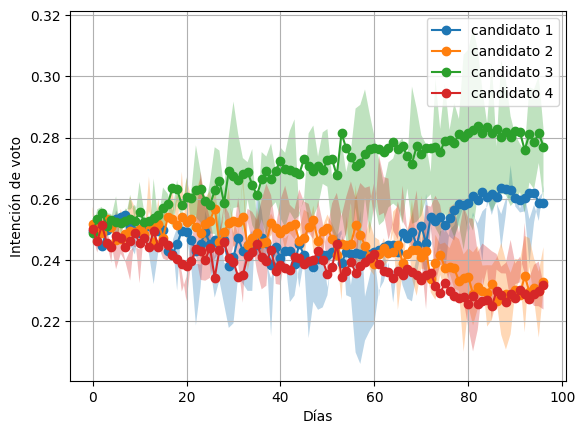

In [79]:
for i in range(4):
    plt.plot(range(days), porcentajes[:,i], 'o-', label= 'candidato {}'.format(i+1))
    plt.fill_between(range(days), q1[:,i], q2[:,i],alpha=0.3)
plt.xlabel("Días")
plt.ylabel("Intención de voto")
plt.grid()
plt.legend()

In [80]:
pred = porcentajes[-1]
print('Kast: {:%}'.format(pred[0]))
print('Sichel: {:%}'.format(pred[1]))
print('Boric: {:%}'.format(pred[2]))
print('Provoste: {:%}'.format(pred[3]))

Kast: 25.843698%
Sichel: 23.287728%
Boric: 27.703151%
Provoste: 23.165423%


## d=0.5

In [81]:
np.random.seed(789)
muestra2, c = modelo_v2(datos2021, 5_000, d=0.5)
muestra2 = muestra2[1000::100]
y = muestra2.mean(0)

In [82]:
days = np.size(y, 0)
for i in range(days):
    print('aceptados dia {}: {:%}'.format(i+1, c[i]/5_000))

aceptados dia 1: 14.220000%
aceptados dia 2: 3.020000%
aceptados dia 3: 2.820000%
aceptados dia 4: 3.200000%
aceptados dia 5: 2.680000%
aceptados dia 6: 2.940000%
aceptados dia 7: 2.780000%
aceptados dia 8: 2.460000%
aceptados dia 9: 3.120000%
aceptados dia 10: 2.880000%
aceptados dia 11: 2.900000%
aceptados dia 12: 3.080000%
aceptados dia 13: 2.700000%
aceptados dia 14: 2.980000%
aceptados dia 15: 8.320000%
aceptados dia 16: 14.580000%
aceptados dia 17: 14.940000%
aceptados dia 18: 2.820000%
aceptados dia 19: 8.200000%
aceptados dia 20: 2.480000%
aceptados dia 21: 2.680000%
aceptados dia 22: 11.760000%
aceptados dia 23: 2.440000%
aceptados dia 24: 3.120000%
aceptados dia 25: 2.420000%
aceptados dia 26: 9.200000%
aceptados dia 27: 2.600000%
aceptados dia 28: 2.220000%
aceptados dia 29: 2.580000%
aceptados dia 30: 10.440000%
aceptados dia 31: 10.420000%
aceptados dia 32: 2.620000%
aceptados dia 33: 2.000000%
aceptados dia 34: 2.380000%
aceptados dia 35: 2.000000%
aceptados dia 36: 2.240

In [83]:
q = [0.025, 0.975]
q1, q2 = np.quantile(muestra2, q, axis=0)
porcentajes = np.zeros((days, 4))
for day in range(days):
    x = y[day]
    porcentajes[day] = x / x.sum()
    q1[day] = q1[day] / q1[day].sum()
    q2[day] = q2[day] / q2[day].sum()

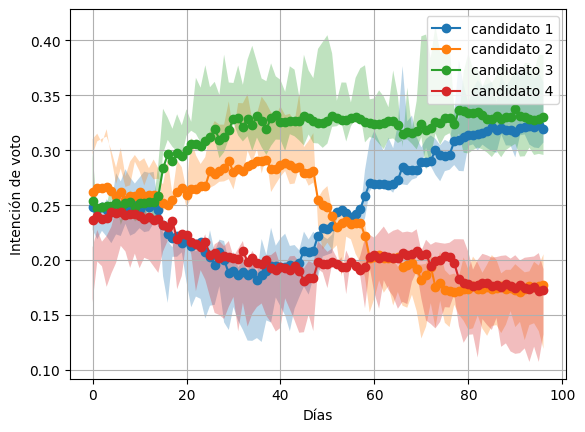

In [84]:
for i in range(4):
    plt.plot(range(days), porcentajes[:,i], 'o-', label= 'candidato {}'.format(i+1))
    plt.fill_between(range(days), q1[:,i], q2[:,i],alpha=0.3)
plt.xlabel("Días")
plt.ylabel("Intención de voto")
plt.grid()
plt.legend()

In [85]:
pred = porcentajes[-1]
print('Kast: {:%}'.format(pred[0]))
print('Sichel: {:%}'.format(pred[1]))
print('Boric: {:%}'.format(pred[2]))
print('Provoste: {:%}'.format(pred[3]))

Kast: 31.980721%
Sichel: 17.713516%
Boric: 33.019279%
Provoste: 17.286484%


## d=0.05

In [86]:
np.random.seed(789)
muestra2, c = modelo_v2(datos2021, 5_000, d=0.05)
muestra2 = muestra2[1000::100]
y = muestra2.mean(0)

In [87]:
days = np.size(y, 0)
for i in range(days):
    print('aceptados dia {}: {:%}'.format(i+1, c[i]/5_000))

aceptados dia 1: 45.180000%
aceptados dia 2: 64.400000%
aceptados dia 3: 62.800000%
aceptados dia 4: 62.480000%
aceptados dia 5: 63.460000%
aceptados dia 6: 63.480000%
aceptados dia 7: 62.740000%
aceptados dia 8: 63.560000%
aceptados dia 9: 60.640000%
aceptados dia 10: 60.800000%
aceptados dia 11: 62.820000%
aceptados dia 12: 62.540000%
aceptados dia 13: 60.760000%
aceptados dia 14: 61.060000%
aceptados dia 15: 41.040000%
aceptados dia 16: 44.880000%
aceptados dia 17: 45.220000%
aceptados dia 18: 61.520000%
aceptados dia 19: 42.160000%
aceptados dia 20: 61.180000%
aceptados dia 21: 60.800000%
aceptados dia 22: 43.760000%
aceptados dia 23: 61.180000%
aceptados dia 24: 60.100000%
aceptados dia 25: 58.860000%
aceptados dia 26: 45.280000%
aceptados dia 27: 59.940000%
aceptados dia 28: 59.100000%
aceptados dia 29: 58.880000%
aceptados dia 30: 43.400000%
aceptados dia 31: 43.100000%
aceptados dia 32: 58.840000%
aceptados dia 33: 59.060000%
aceptados dia 34: 57.760000%
aceptados dia 35: 57.84

In [88]:
q = [0.025, 0.975]
q1, q2 = np.quantile(muestra2, q, axis=0)
porcentajes = np.zeros((days, 4))
for day in range(days):
    x = y[day]
    porcentajes[day] = x / x.sum()
    q1[day] = q1[day] / q1[day].sum()
    q2[day] = q2[day] / q2[day].sum()

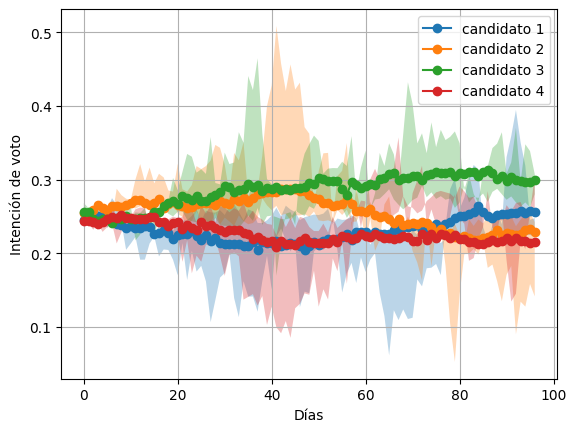

In [89]:
for i in range(4):
    plt.plot(range(days), porcentajes[:,i], 'o-', label= 'candidato {}'.format(i+1))
    plt.fill_between(range(days), q1[:,i], q2[:,i],alpha=0.3)
plt.xlabel("Días")
plt.ylabel("Intención de voto")
plt.grid()
plt.legend()

In [90]:
pred = porcentajes[-1]
print('Kast: {:%}'.format(pred[0]))
print('Sichel: {:%}'.format(pred[1]))
print('Boric: {:%}'.format(pred[2]))
print('Provoste: {:%}'.format(pred[3]))

Kast: 25.587687%
Sichel: 22.936360%
Boric: 29.889096%
Provoste: 21.586857%


In [38]:
np.random.seed(756)
muestra, prediccion, c = modelo2021(datos2021, 5_000)
days = np.size(datos2021, 0)
#for i in range(weeks):
 #   print('aceptados semana {}: {:%}'.format(i+1, c[i]/10000))

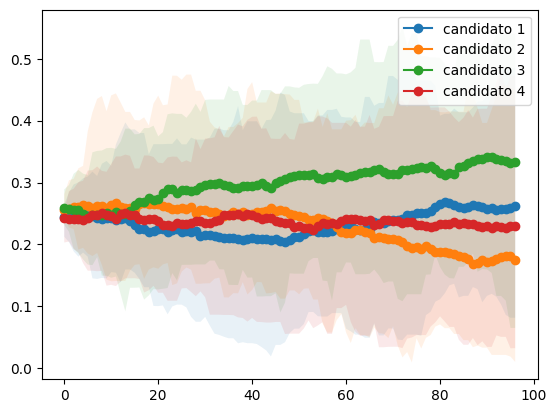

In [43]:
x = muestra[1000::100].mean(0)
q = [0.025, 0.975]
q1, q2 = np.quantile(muestra[1000::100], q, axis=0)
for i in range(4):
    plt.plot(range(days), x[1:,i], 'o-', label= 'candidato {}'.format(i+1))
    plt.fill_between(range(days), q1[1:,i],q2[1:, i],alpha=0.1)
plt.legend()

In [28]:
pred = x[-1]
print('Kast: {:%}'.format(pred[0]))
print('Sichel: {:%}'.format(pred[1]))
print('Boric: {:%}'.format(pred[2]))
print('Provoste: {:%}'.format(pred[3]))

Kast: 29.271021%
Sichel: 19.105790%
Boric: 32.897145%
Provoste: 18.726044%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d24ecb2b-b17d-41bb-82ac-38080033d82c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>